In [87]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import json
from pathlib import Path

In [2]:
def plot_audio(audio, sr, title):
    fig = plt.figure(figsize=(6, 3))
    plt.plot(np.arange(len(audio))/sr, audio)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(alpha=0.4)
    plt.show()

In [88]:
ir_dataset_path           = Path('../datasets/guitar_chords_v2/impulse_response_emulation/audio_files/')
fx_dataset_path           = Path('../datasets/guitar_chords_v2/fx/audio_files/')
preprocessed_dataset_path = Path('../datasets/guitar_chords_v2/preprocessed_original/audio_files/')
fx_parameters_path        = Path('../datasets/guitar_chords_v2/fx/parameters.json')

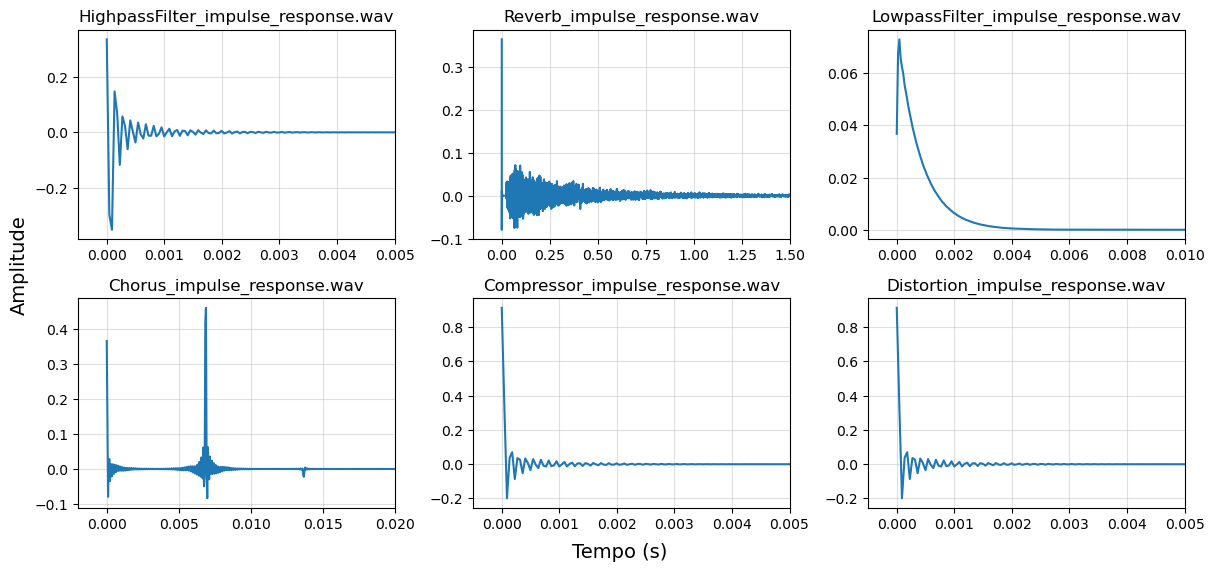

In [101]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

dict_x_lims = {
    'HighpassFilter_impulse_response.wav': [-0.0005, 0.005],
    'Reverb_impulse_response.wav':         [-0.1500, 1.500],
    'LowpassFilter_impulse_response.wav':  [-0.0010, 0.010],
    'Chorus_impulse_response.wav':         [-0.0020, 0.020],
    'Compressor_impulse_response.wav':     [-0.0005, 0.005],
    'Distortion_impulse_response.wav':     [-0.0005, 0.005],
}

for i_fig, ir_audio_path in enumerate(ir_dataset_path.glob('*.wav')):
    i     = 0 if i_fig < 3 else 1
    j     = i_fig - 3 if i else i_fig
    y, sr = librosa.load(ir_audio_path)
    axs[i, j].plot(np.arange(len(y))/sr, y)
    axs[i, j].set_title(ir_audio_path.name)
    axs[i, j].grid(alpha=0.4)
    axs[i, j].set_xlim(dict_x_lims.get(ir_audio_path.name))

fig.text(0.5, 0.02, 'Tempo (s)', ha='center', va='center', fontsize=14)
fig.text(0.0, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../results/ir_audios_plot_in_time.pdf', bbox_inches='tight')
plt.show()


In [94]:
lst_fx = list(json.load(open(fx_parameters_path))['fx'].keys())

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

for i_fig, ir_audio_path in enumerate(ir_dataset_path.glob('*.wav')):
    i     = 0 if i_fig < 3 else 1
    j     = i_fig - 3 if i else i_fig
    y, sr = librosa.load(ir_audio_path)
    axs[i, j].plot(np.arange(len(y))/sr, y)
    axs[i, j].set_title(ir_audio_path.name)
    axs[i, j].grid(alpha=0.4)
    axs[i, j].set_xlim(dict_x_lims.get(ir_audio_path.name))

fig.text(0.5, 0.02, 'Tempo (s)', ha='center', va='center', fontsize=14)
fig.text(0.0, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../results/ir_audios_plot_in_time.pdf', bbox_inches='tight')
plt.show()


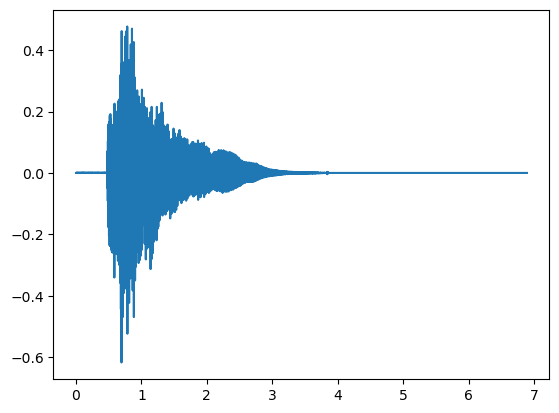

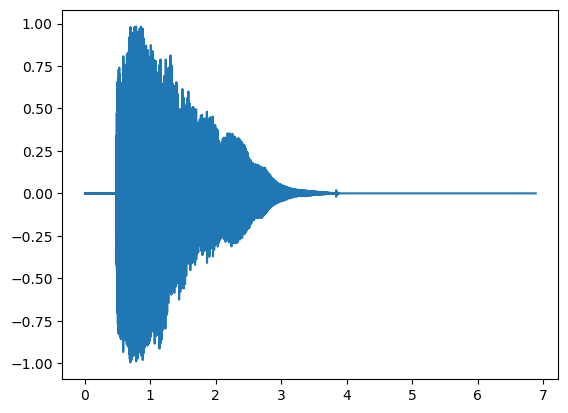

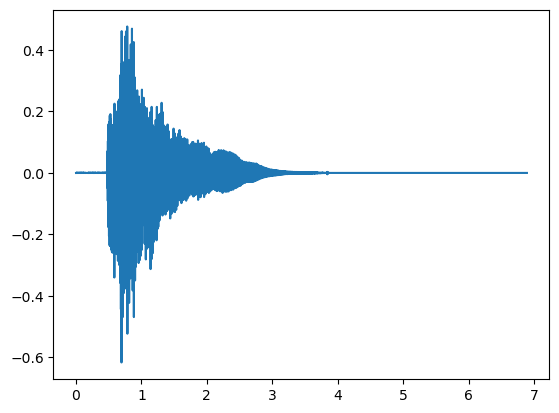

In [105]:
audio_name = 'Am_Classic_Jo_1.wav'
fx_name    = 'Distortion'

# fig, axs = plt.subplots(2, 3, figsize=(12, 6))

y, sr = librosa.load(preprocessed_dataset_path/audio_name)
plt.plot(np.arange(len(y))/sr, y)
plt.show()

y, sr = librosa.load(fx_dataset_path/fx_name/audio_name)
plt.plot(np.arange(len(y))/sr, y)
plt.show()

y, sr = librosa.load(ir_dataset_path/fx_name/audio_name)
plt.plot(np.arange(len(y))/sr, y)
plt.show()

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

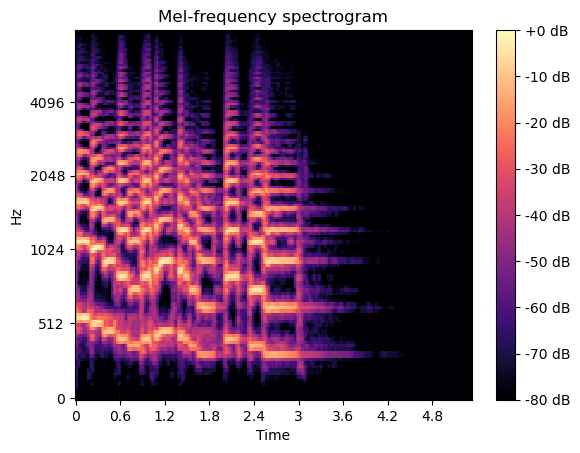

In [107]:
y, sr = librosa.load(librosa.ex('trumpet'))
S = librosa.feature.melspectrogram(y=y, sr=sr)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')